In [1]:
!pip install resampy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.9 MB/s eta 0:00:00


In [2]:
!pip install librosa

In [24]:
## Importing All Necessary Modules
import pandas as pd
import matplotlib.pyplot as plt
import IPython as ipd
import librosa
import librosa.display
from IPython.display import Audio
import numpy as np
import resampy
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [25]:
## Reading A sample audio using librosa
file_name='/content/99180-9-0-7.wav'
data,sample_rate=librosa.load(file_name)
data,sample_rate


(array([ 0.14519662,  0.14633082,  0.07958014, ..., -0.14201266,
        -0.08451992, -0.03317223], dtype=float32),
 22050)

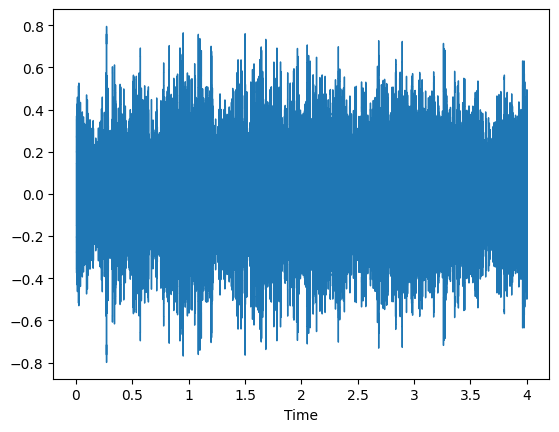

In [26]:
librosa.display.waveshow(data,sr=sample_rate)
Audio(data,rate=sample_rate)

In [27]:
# Extracting Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples.
mfcc=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)
print(mfcc.shape)

(40, 173)


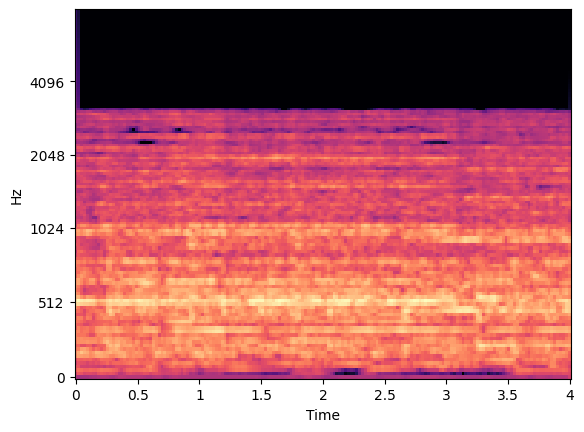

In [28]:
# Create Mel spectrogram
mel_spec = librosa.feature.melspectrogram(y=data, sr=sample_rate, n_mels=128)
# Convert to decibels for better visualization
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
librosa.display.specshow(mel_spec_db, sr=sample_rate, x_axis='time', y_axis='mel', fmax=8000, cmap='magma')

In [29]:
mel_spec,mel_spec_db

(array([[7.32037276e-02, 4.56531495e-02, 4.22960781e-02, ...,
         8.83871093e-02, 1.00654185e-01, 2.86472589e-01],
        [3.84364873e-01, 1.35748088e+00, 9.11843598e-01, ...,
         7.55850375e-01, 7.00035274e-01, 5.74968517e-01],
        [1.76575363e+00, 3.78093266e+00, 2.87296438e+00, ...,
         2.96662545e+00, 2.19289827e+00, 8.37718248e-01],
        ...,
        [2.87971576e-04, 7.15647911e-05, 1.50241520e-14, ...,
         1.35560788e-14, 2.68989709e-07, 2.79146957e-06],
        [2.79390981e-04, 6.94287737e-05, 5.29147327e-15, ...,
         8.80418412e-15, 2.65143797e-07, 2.75145999e-06],
        [2.74167571e-04, 6.81294114e-05, 6.02767534e-15, ...,
         1.00442209e-14, 2.62639787e-07, 2.72542820e-06]], dtype=float32),
 array([[-40.868443, -42.919067, -43.250774, ..., -40.04989 , -39.48546 ,
         -34.942944],
        [-33.666336, -28.186438, -29.914572, ..., -30.729416, -31.062576,
         -31.917334],
        [-27.044474, -23.737785, -24.930473, ..., -24.7911

In [14]:
# Reading The Metadata
metadata=pd.read_csv('/content/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


(<Axes: xlabel='count', ylabel='class'>,
 class
 dog_bark            1000
 children_playing    1000
 air_conditioner     1000
 street_music        1000
 jackhammer          1000
 engine_idling       1000
 drilling            1000
 siren                929
 car_horn             429
 gun_shot             374
 Name: count, dtype: int64)

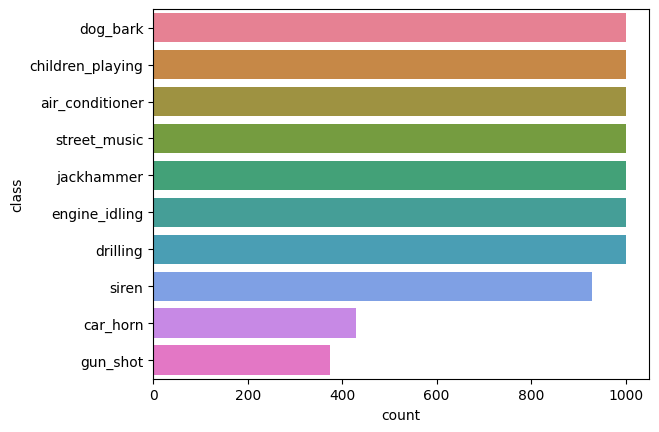

In [22]:
#checking if the data is imbalanced or not
sns.countplot(data=metadata, y='class', palette='husl', order=metadata['class'].value_counts().index)

In [23]:
metadata['class'].value_counts()

,count
class,
dog_bark,1000
children_playing,1000
air_conditioner,1000
street_music,1000
jackhammer,1000
engine_idling,1000
drilling,1000
siren,929
car_horn,429


Showing waveplot and Mel Spectogram of each class

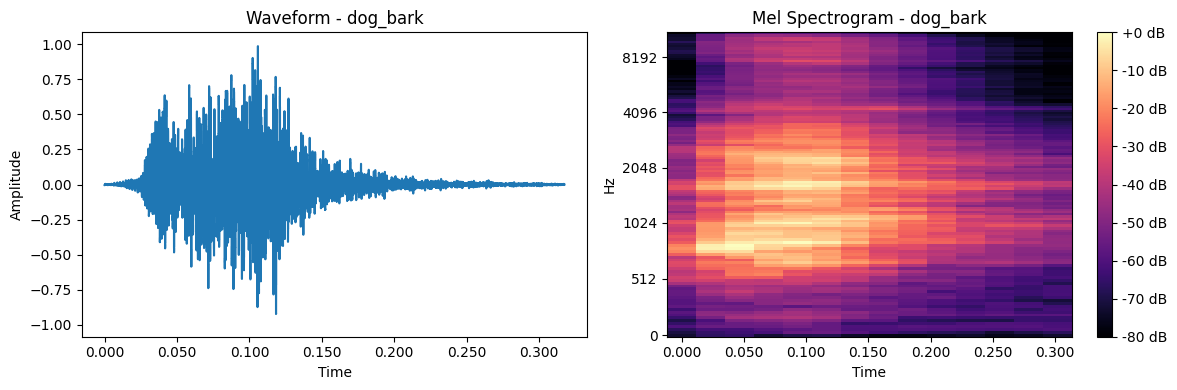

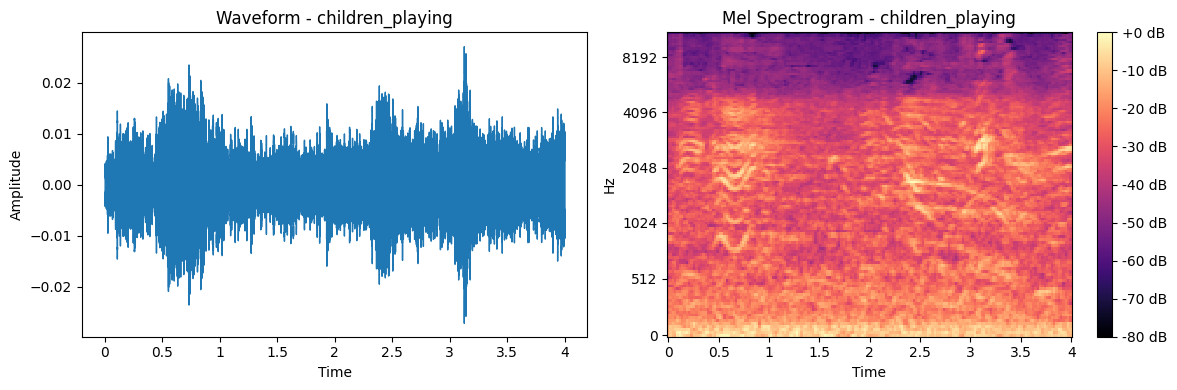

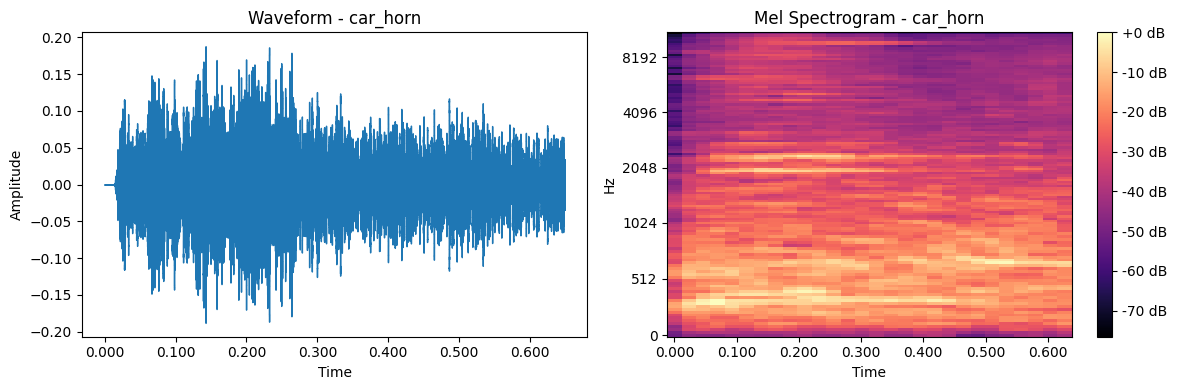

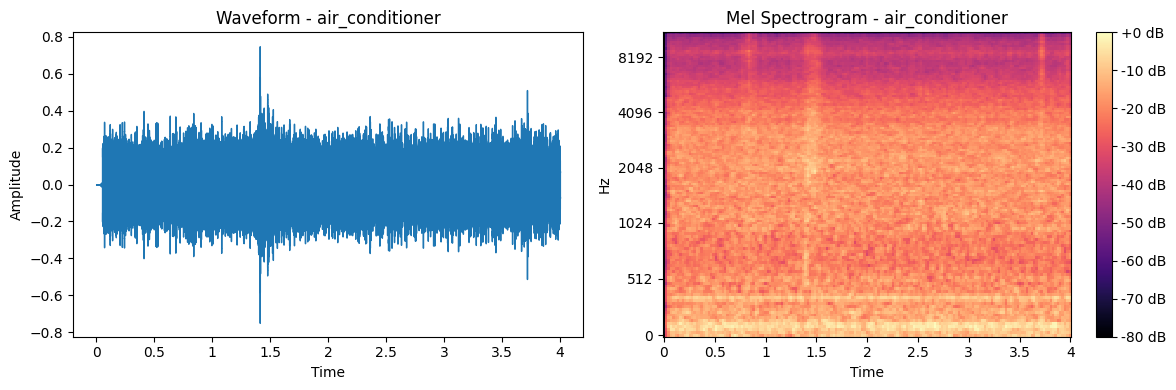

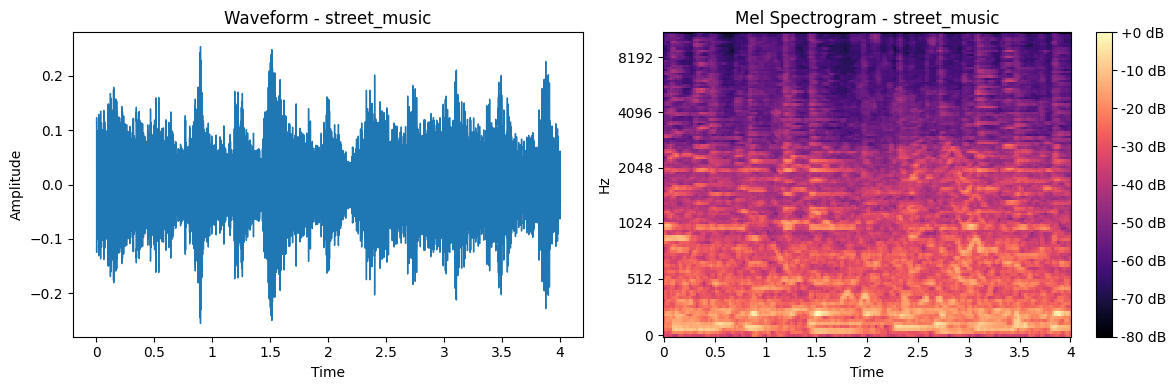

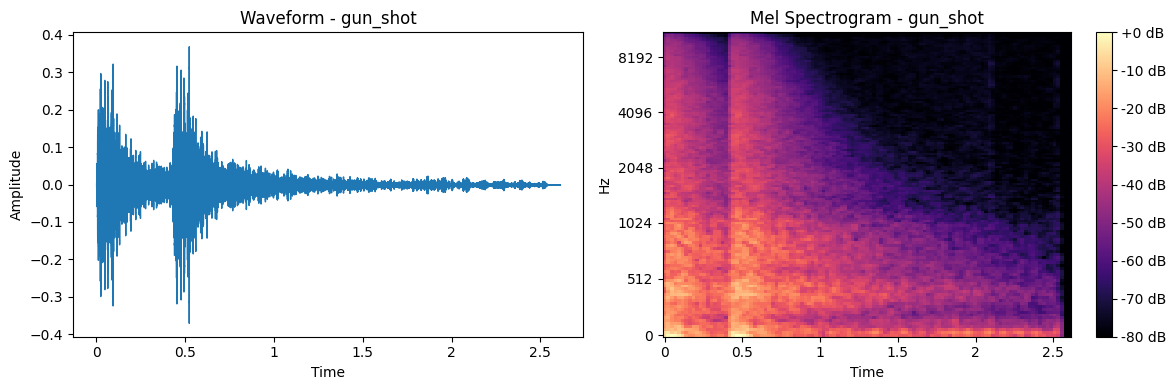

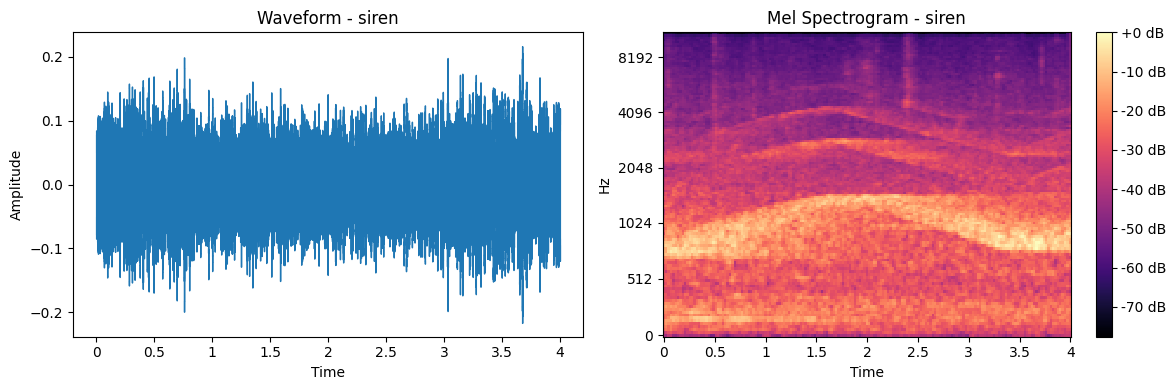

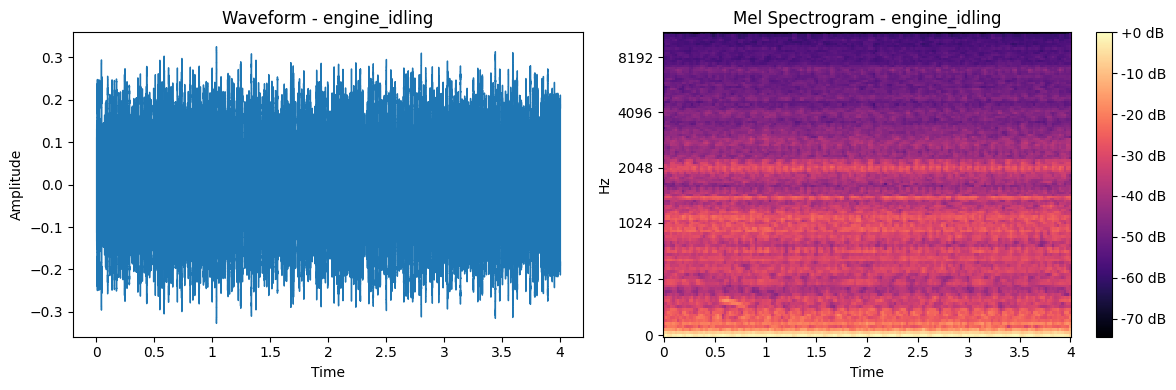

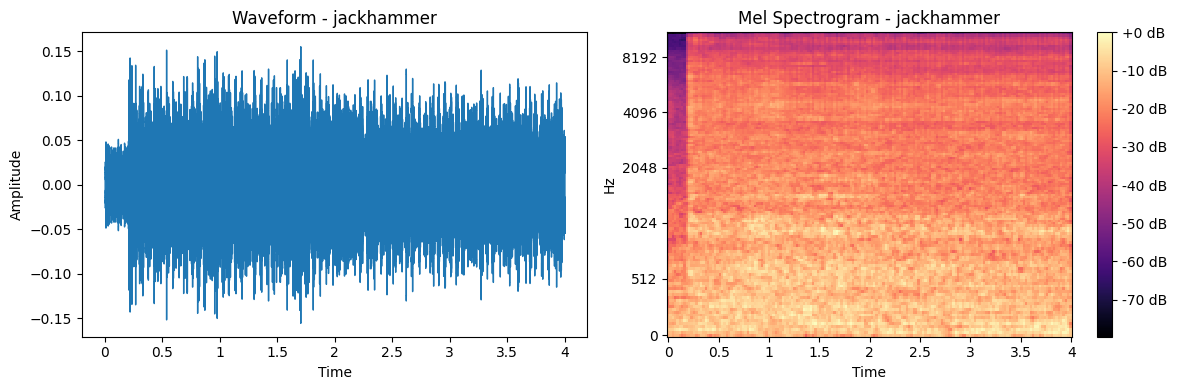

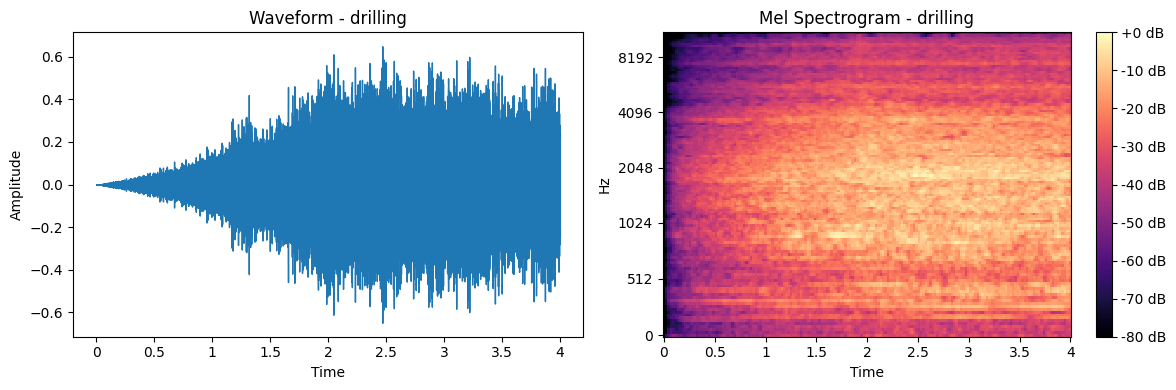

In [19]:
# Get unique classes
classes = metadata['class'].unique()
DATA_PATH = '/content/drive/MyDrive/archive'

# Create figure
for label in classes:
    # Get one sample from the class
    sample = metadata[metadata['class'] == label].iloc[0]
    fold = sample['fold']
    file_name = sample['slice_file_name']
    file_path = os.path.join(DATA_PATH, f"fold{fold}", file_name)

    # Load audio
    y, sr = librosa.load(file_path)

    # Plot
    plt.figure(figsize=(12, 4))

    # Waveform
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform - {label}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

    # Mel Spectrogram
    plt.subplot(1, 2, 2)
    mel = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel')
    plt.title(f"Mel Spectrogram - {label}")
    plt.colorbar(format="%+2.0f dB")

    # Show plots
    plt.tight_layout()
    plt.show()


Model Creation (CNN)

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
from keras.callbacks import EarlyStopping,ReduceLROnPlateau


In [ ]:
DATA_PATH = '/content/drive/MyDrive/archive'
SAMPLE_RATE = 22050
DURATION = 4  # seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION
NUM_MELS = 128

In [ ]:
def extract_mel_spectrogram(file_path):
        audio, sr = librosa.load(file_path, sr=SAMPLE_RATE)
        # Force trim or pad to exact 4 seconds (88,200 samples)
        if len(audio) > SAMPLES_PER_TRACK:
            audio = audio[:SAMPLES_PER_TRACK]
        elif len(audio) < SAMPLES_PER_TRACK:
            pad_width = SAMPLES_PER_TRACK - len(audio)
            audio = np.pad(audio, (0, pad_width))

        mel = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=NUM_MELS)
        mel_db = librosa.power_to_db(mel, ref=np.max)
        if mel_db.shape[1] < 173:
          pad_width = 173 - mel_db.shape[1]
          mel_db = np.pad(mel_db, ((0, 0), (0, pad_width)), mode='constant')
        elif mel_db.shape[1] > 173:
          mel_db = mel_db[:, :173]

        return mel_db


In [ ]:
from tqdm import tqdm
extracted_features=[]
for index, row in tqdm(metadata.iterrows()):
    file_path = os.path.join(DATA_PATH, f"fold{row['fold']}", row['slice_file_name'])
    label = row['class']
    mel_spec = extract_mel_spectrogram(file_path)
    extracted_features.append([mel_spec,label])



8732it [43:41,  3.33it/s]


In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.to_csv('extracted_features_cnn_final.csv',index=False)

In [ ]:
# Separate features and labels from extracted_features
features = []
labels = []

for feature, label in extracted_features:
    features.append(feature.astype(np.float32))  # Convert to float32
    labels.append(label)

features = np.array(features)
labels = np.array(labels)

In [ ]:
# Normalize
# Reshape for CNN (samples, height, width, channel)
features = (features - np.mean(features, axis=(1,2), keepdims=True)) / \
           (np.std(features, axis=(1,2), keepdims=True) + 1e-6)

X = features[..., np.newaxis]


In [ ]:
X.shape

(8732, 128, 173, 1)

In [ ]:
# Label Encoding for y
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y = to_categorical(labelencoder.fit_transform(labels))

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=29)

In [ ]:
from keras.layers import BatchNormalization
model = Sequential([
    Input(shape=(X.shape[1], X.shape[2], 1)),

    # Conv Block 1
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    # Conv Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    # Conv Block 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
     # Conv Block 4
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# ✅ Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)

In [ ]:
# ✅ Train Model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/savedmodel/audio_classification_cnn.keras',
                               verbose=1, save_best_only=True)
start = datetime.now()
history = model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1,validation_data=(X_test, y_test),
                    callbacks=[early_stopping, reduce_lr,checkpointer])
duration = datetime.now() - start
print("Training completed in time: ", duration)


Epoch 1/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2614 - loss: 3.7197
Epoch 1: val_loss improved from inf to 10.79633, saving model to /content/drive/MyDrive/savedmodel/audio_classification_cnn.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 669s 3s/step - accuracy: 0.2617 - loss: 3.7140 - val_accuracy: 0.1694 - val_loss: 10.7963 - learning_rate: 0.0010
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4080 - loss: 1.7260
Epoch 2: val_loss did not improve from 10.79633
219/219 ━━━━━━━━━━━━━━━━━━━━ 673s 3s/step - accuracy: 0.4080 - loss: 1.7259 - val_accuracy: 0.1317 - val_loss: 12.5256 - learning_rate: 0.0010
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4454 - loss: 1.5849
Epoch 3: val_loss improved from 10.79633 to 3.35522, saving model to /content/drive/MyDrive/savedmodel/audio_classification_cnn.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 693s 3s/step - accuracy: 0.4454 - loss: 1.5847 - val_accuracy: 0.3068 - val_loss: 3.3552 - learning_rate: 0.0010
Epoch

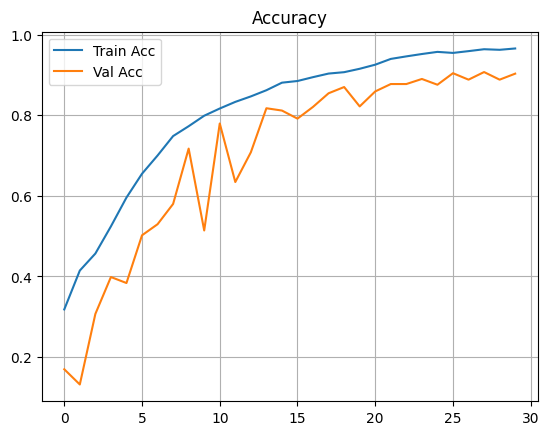

In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.grid(); plt.title("Accuracy"); plt.show()

Accuracy

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9044075608253479


Testing Model with Random File

In [ ]:
filename = "/content/two_dogs_barking_9LS.wav"

mel_spectrogram = extract_mel_spectrogram(filename)
# Normalize to [0, 1]
mel_db = (mel_spectrogram - np.min(mel_spectrogram)) / (np.max(mel_spectrogram) - np.min(mel_spectrogram) + 1e-6)

# Reshape for CNN
mel_db = mel_db.reshape(1, 128, 173, 1)
prediction = model.predict(mel_db)
predicted_label = np.argmax(prediction, axis=1)
predicted_class = labelencoder.inverse_transform(predicted_label)

print("🔊 Predicted class name:", predicted_class[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
🔊 Predicted class name: dog_bark
